# Regresión Lineal Simple
Los modelos lineales son una de las herramientas más importantes del análisis cuantitativo. Los utilizamos cuando queremos predecir –o explicar– una variable dependiente a partir de una variable independiente. El uso mismo de la terminología de variables dependientes e independientes nos da una pista del abordaje: el ajuste de modelos lineales busca encontrar una función –en el sentido matemático– que nos permite expresar a una variable a partir de otras.

### Autores
   * Efrén Jiménez

## Análisis del Problema
Este conjunto de datos contiene precios de venta de casas para el Condado de King, que incluye Seattle. Incluye casas vendidas entre mayo de 2014 y mayo de 2015.

Es un gran conjunto de datos para evaluar modelos de regresión simples.

![Proceso ROC](img/dataset-cover.jpg)

## Entendimiento de los Datos

Con el fin de analizar y tratar de predecir el precio de las casas ubicadas en el condado de King, se trabajó con un conjunto de datos que contiene 8273 observaciones y 2 variables:

- price (precio): numérica, con un rango de 115000 a 1950000.
- sqft_lot (metros cuadrados del lote): numérica, con un rango de 500 a 7730

In [1]:
casas <- read.csv('kc_house_data.csv', header = T, na.strings = '?')

#Utilice la función str() para ver la estructura del conjunto de datos:
print("----------------------------------------------summary---------------------------------------")
summary(casas)

print("----------------------------------------------Correlación---------------------------------------")
#Función de correlación
cor(casas[,c(3,4,5,6,7,8,9,10,11,12,12,13,14,15)])


str(casas)

[1] "----------------------------------------------summary---------------------------------------"


       id                         date          price            bedrooms     
 Min.   :1.200e+06   20140623T000000:  57   Min.   : 115000   Min.   : 0.000  
 1st Qu.:2.155e+09   20140708T000000:  52   1st Qu.: 370000   1st Qu.: 3.000  
 Median :3.905e+09   20140826T000000:  52   Median : 495000   Median : 3.000  
 Mean   :4.604e+09   20140718T000000:  51   Mean   : 534373   Mean   : 3.414  
 3rd Qu.:7.335e+09   20140709T000000:  50   3rd Qu.: 664963   3rd Qu.: 4.000  
 Max.   :9.900e+09   20140714T000000:  50   Max.   :1950000   Max.   :10.000  
                     (Other)        :7960                                     
   bathrooms     sqft_living      sqft_lot           floors     
 Min.   :0.00   Min.   : 500   Min.   :    520   Min.   :1.000  
 1st Qu.:1.75   1st Qu.:1490   1st Qu.:   5350   1st Qu.:1.000  
 Median :2.25   Median :2010   Median :   7980   Median :1.500  
 Mean   :2.18   Mean   :2157   Mean   :  17610   Mean   :1.529  
 3rd Qu.:2.50   3rd Qu.:2660   3rd Qu.:  11

[1] "----------------------------------------------Correlación---------------------------------------"


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,grade.1,sqft_above,sqft_basement,yr_built
price,1.00000000,0.53675314,0.723172051,0.95869475,0.160080479,0.360789982,0.0307858678,0.256101647,-0.09363403,0.7996554881,0.7996554881,0.84173621,0.30688518,0.31307036
bedrooms,0.53675314,1.00000000,0.491650824,0.57251109,0.021942277,0.151468166,-0.0197446572,0.095430263,0.02223913,0.3796975679,0.3796975679,0.45294069,0.28199161,0.10388554
bathrooms,0.72317205,0.49165082,1.000000000,0.74295656,0.097241089,0.509105652,-0.0043949988,0.147481912,-0.17253526,0.6810723733,0.6810723733,0.66509068,0.21246562,0.52852281
sqft_living,0.95869475,0.57251109,0.742956565,1.00000000,0.180305665,0.362492648,0.0238426330,0.247731728,-0.10643148,0.8006153524,0.8006153524,0.87868822,0.31874547,0.33770405
sqft_lot,0.16008048,0.02194228,0.097241089,0.18030567,1.000000000,-0.001045608,0.0060149560,0.082977043,-0.02216250,0.1280836366,0.1280836366,0.20377183,-0.03254689,0.06136310
floors,0.36078998,0.15146817,0.509105652,0.36249265,-0.001045608,1.000000000,-0.0096011497,-0.003104151,-0.31313671,0.4734795613,0.4734795613,0.53427188,-0.31282305,0.54545974
waterfront,0.03078587,-0.01974466,-0.004394999,0.02384263,0.006014956,-0.009601150,1.0000000000,0.253228280,0.01736526,-0.0001575991,-0.0001575991,0.00432122,0.04061562,-0.02985629
view,0.25610165,0.09543026,0.147481912,0.24773173,0.082977043,-0.003104151,0.2532282804,1.000000000,0.02640667,0.1694502868,0.1694502868,0.12452806,0.26390869,-0.04215694
condition,-0.09363403,0.02223913,-0.172535264,-0.10643148,-0.022162502,-0.313136712,0.0173652641,0.026406672,1.00000000,-0.2332493284,-0.2332493284,-0.21733185,0.21189604,-0.39532174
grade,0.79965549,0.37969757,0.681072373,0.80061535,0.128083637,0.473479561,-0.0001575991,0.169450287,-0.23324933,1.0000000000,1.0000000000,0.80441695,0.05481084,0.53679071


'data.frame':	8272 obs. of  21 variables:
 $ id           : num  6.41e+09 5.63e+09 7.24e+09 2.01e+09 1.14e+08 ...
 $ date         : Factor w/ 351 levels "20140502T000000",..: 210 274 11 238 27 154 288 245 91 13 ...
 $ price        : int  538000 180000 1225000 291850 310000 400000 530000 650000 395000 385000 ...
 $ bedrooms     : int  3 2 4 3 3 3 5 4 3 4 ...
 $ bathrooms    : num  2.25 1 4.5 1.5 1 1.75 2 3 2 1.75 ...
 $ sqft_living  : int  2570 770 5420 1060 1430 1370 1810 2950 1890 1620 ...
 $ sqft_lot     : int  7242 10000 101930 9711 19901 9680 4850 5000 14040 4980 ...
 $ floors       : num  2 1 1 1 1.5 1 1.5 2 2 1 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 3 0 0 ...
 $ condition    : int  3 3 3 3 4 4 3 3 3 4 ...
 $ grade        : int  7 6 11 7 7 7 7 9 7 7 ...
 $ sqft_above   : int  2170 770 3890 1060 1430 1370 1810 1980 1890 860 ...
 $ sqft_basement: int  400 0 1530 0 0 0 0 970 0 760 ...
 $ yr_built     : int  1951 1933 2001 1963 1927 197

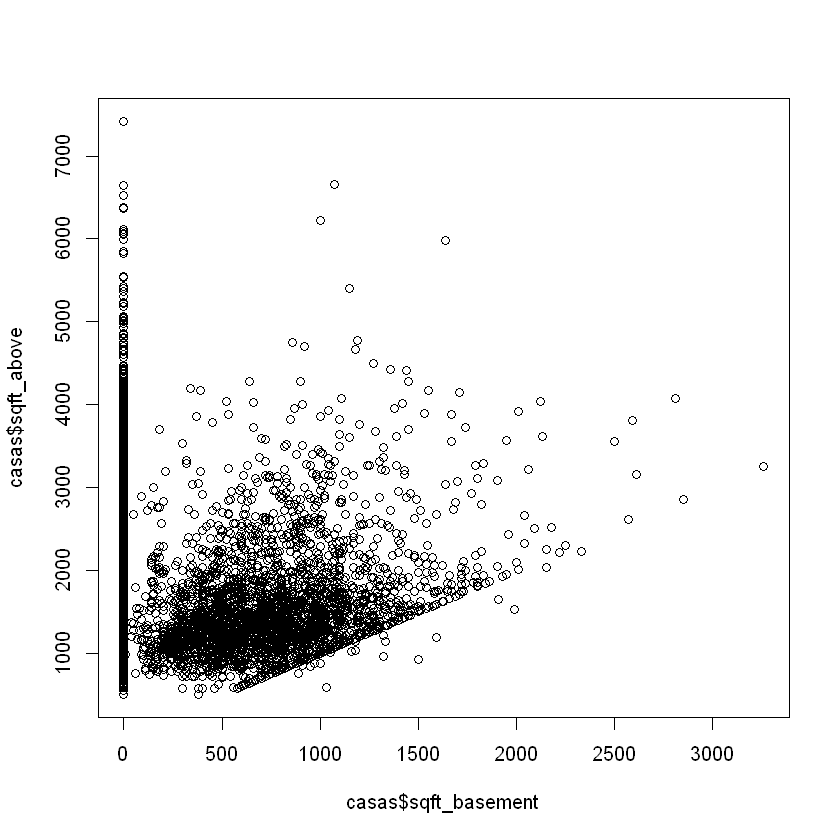

In [17]:
plot(y = casas$sqft_above,x = casas$sqft_basement)

## Exploración de los Datos

In [5]:
#librerías utilizadas
library(caTools)

#Librería de gráficos
library(ggplot2)
#Evitar mostrar warning messages
options(warn=-1)

#establezca el directorio de trabajo
#cargue el archivo a una variable que se llame casas usando la función read.csv
casas <- read.csv('kc_house_data.csv', header = T, na.strings = '?')

#Selecionar 
casas<-casas[,c(3,6)]

#Utilice la función str() para ver la estructura del conjunto de datos:
summary(casas)

#Dividir el conjunto de datos en uno de entrenamiento y otro de pruebas:
set.seed(1376)
splt <- sample.split(casas$price, SplitRatio = 0.7)
#Entrenamiento
casas.entrenamiento <- casas[splt, ]
#Prueba
casas.prueba <- casas[!splt, ]


     price          sqft_living  
 Min.   : 115000   Min.   : 500  
 1st Qu.: 370000   1st Qu.:1490  
 Median : 495000   Median :2010  
 Mean   : 534373   Mean   :2157  
 3rd Qu.: 664963   3rd Qu.:2660  
 Max.   :1950000   Max.   :7730  

>Es importante siempre validar los rangos de los conjuntos de datos creados, para evitar caer en extrapolación:

In [6]:
print(".................................Entrenamiento..................................")
summary(casas.entrenamiento)
print(".................................Pruebas........................................")
summary(casas.prueba)

[1] ".................................Entrenamiento.................................."


     price          sqft_living  
 Min.   : 115000   Min.   : 500  
 1st Qu.: 370028   1st Qu.:1500  
 Median : 499000   Median :2020  
 Mean   : 537508   Mean   :2168  
 3rd Qu.: 669597   3rd Qu.:2670  
 Max.   :1950000   Max.   :7730  

[1] ".................................Pruebas........................................"


     price          sqft_living  
 Min.   : 148000   Min.   : 630  
 1st Qu.: 370000   1st Qu.:1480  
 Median : 489450   Median :2000  
 Mean   : 525654   Mean   :2125  
 3rd Qu.: 650000   3rd Qu.:2620  
 Max.   :1680000   Max.   :7620  

De acuerdo con los resúmenes anteriores, las observaciones estan en el rango esperado.
###### Se realizara un diagrama de dispersión

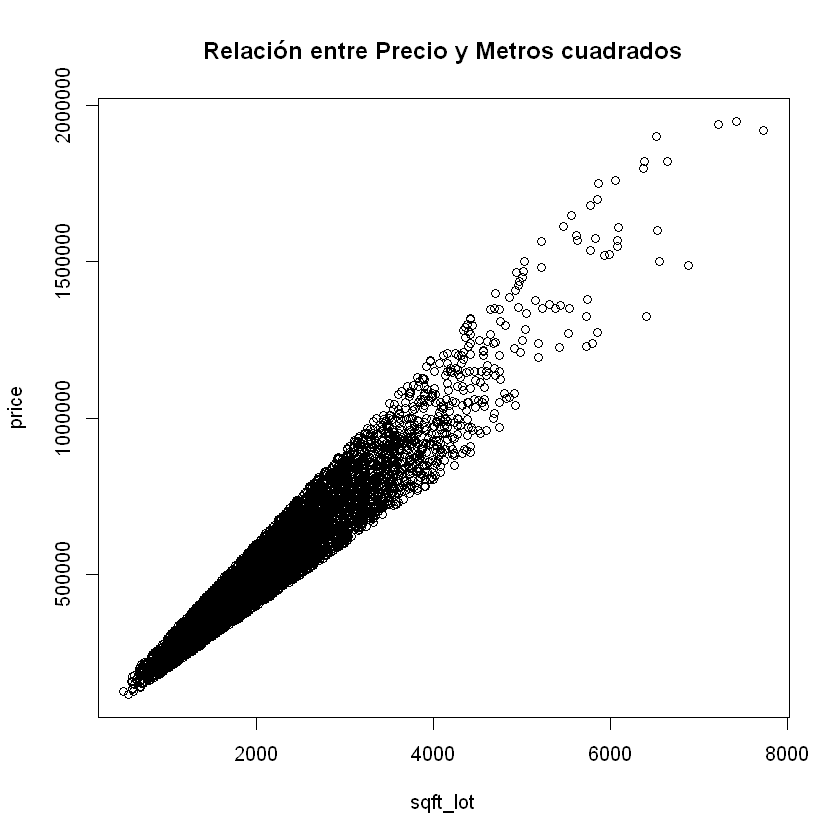

In [7]:
plot(y = casas.entrenamiento$price,x = casas.entrenamiento$sqft_living, main = 'Relación entre Precio y Metros cuadrados', ylab = 'price', xlab = 'sqft_lot')

La información del gráfico anterior podemos complementarla con una matriz de correlación:

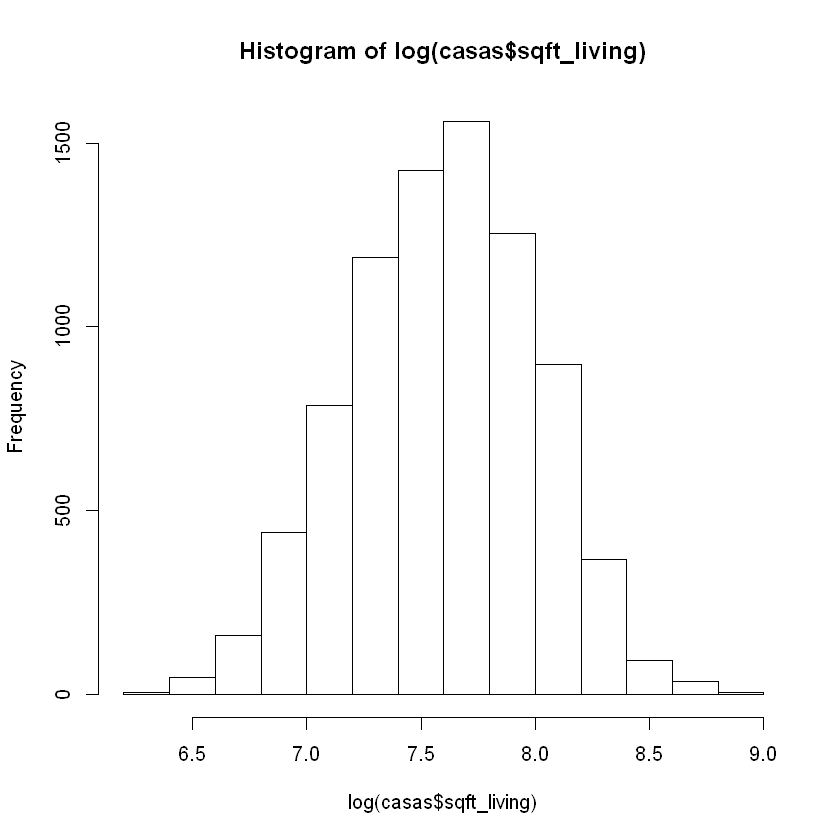

In [9]:
hist(log(casas$sqft_living))

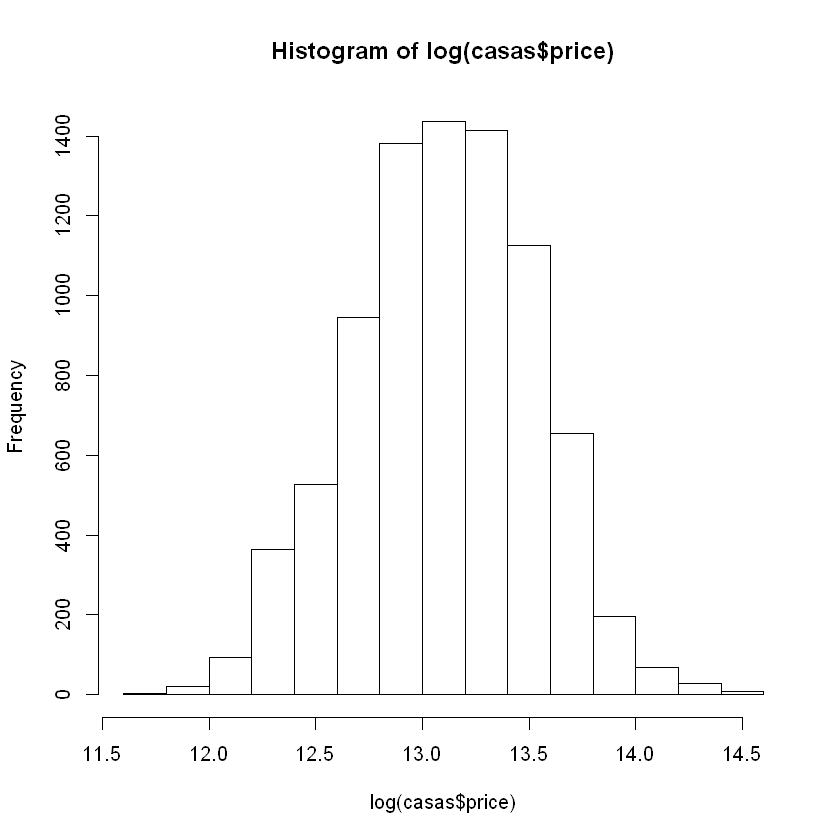

In [3]:
hist(log(casas$price))

In [10]:
cor(casas.entrenamiento)

,price,sqft_living
price,1.0000000,0.9598279
sqft_living,0.9598279,1.0000000


### Tipos de relación
- -1,00 = Correlación negativa perfecta
- -0,90 = Correlación negativa muy fuerte
- -0,75 = Correlación negativa considerable
- -0,50 = Correlación negativa media
- -0,10 = Correlación negativa débil
- 0,00  = No existe correlación lineal alguna entre las variables
- 0,10  = Correlación positiva débil
- 0,50  = Correlación positiva media
- 0,75 = Correlación positiva considerable
- 0,90  = Correlación positiva muy fuerte
- 1,00  = Correlación positiva perfecta

### Exiten varios metodos de correlación
#### Coeficiente de Pearson

In [11]:
cor.test(casas$price,casas$sqft_living, method = "pearson")


	Pearson's product-moment correlation

data:  casas$price and casas$sqft_living
t = 306.51, df = 8270, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9569145 0.9604030
sample estimates:
      cor 
0.9586948 


#### Coeficiente de Spearman

In [ ]:
cor.test(casas$price,casas$sqft_living, method =  "spearman")

Como se puede apreciar en la matriz de gráficos de dispersión, y confirmar con la matriz de correlación, hay una correlación significativa entre los variables price y sqft_lot

## Modelo de Minería de Datos

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

In [ ]:
#install.packages('caTools')

In [ ]:
#install.packages('ggplot2')

In [12]:
#Generar el modelo de regresión lineal
reg.price <- lm(price ~ sqft_living, data = casas.entrenamiento)

summary(reg.price)



Call:
lm(formula = price ~ sqft_living, data = casas.entrenamiento)

Residuals:
    Min      1Q  Median      3Q     Max 
-259470  -44972   -1142   44278  299118 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1207.6319  2176.3057   0.555    0.579    
sqft_living  247.3847     0.9273 266.775   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 65020 on 6082 degrees of freedom
Multiple R-squared:  0.9213,	Adjusted R-squared:  0.9213 
F-statistic: 7.117e+04 on 1 and 6082 DF,  p-value: < 2.2e-16


#### Nota:

Al realizar este análisis los parámetros de la ecuación de la recta de mínimos cuadrados que relaciona el número de metros de construcción con respecto al precio, para ello, se obtiene la recta Y = 247.3847 * X + 1207.6319

### Notas importantes

![Summaryregresión lineal simple](img/summary_lm.png)

* Call: y muestra la formula con la que obtuvimos el modelo. Es útil para evitar confusiones, especialmente si estamos comparando varios modelos a la vez. Podemos saber exactamente a qué variables dependientes e independientes corresponde el sumario.
* Residuals: y nos da 5 estadísticos sobre la distribución de los residuos del modelo: valores mínimos, 1er, 2do y 3er cuartil y valor máximo. La media de los residuos siempre es cero, así que es un parámetro de referencia que no aparece en el sumario, pero que nos resulta útil. Si los residuos se distribuyen conforme a una distribución normal deberíamos esperar que la mediana sea 0 o muy cerca de 0, y que el 1er y 3er cuartil sean simétricos. Lo mismo para lo valores mínimos o máximos. Si hay desviaciones notables de media y mediana y no hay simetría entre cuartiles es muy probable que no estemos cumpliendo con algunos de los supuestos de los modelos lineales.
* Coefficients: y muestra los coeficientes estimados por el modelo, es decir, los parámetros ocultos β0 y β1 de la ecuación 1. Estas son la ordenada al origen (Intercept) y las pendientes estimadas para cada variable.
* Residual se registra el error estandar para la estimación de cada variable, al que podemos interpretar como el promedio de los residuos. A partir del coeficiente estimado y el error estándar se computa un valor t, un estadístico de la divergencia entre el estimado que produce el modelo y un estimado hipotético con valor 0. Cuanto más alto es el valor t mayor la divergencia entre los coeficientes del modelo y el coeficiente igual a cero. 
* El p-value de la prueba de hipótesis del estadístico t, que indica la probabilidad de obtener un estimado como el que obtuvimos si el coeficiente real fuera 0. Si la probabilidad de este evento es muy baja podemos rechazar la hipótesis de nulidad según la cuál el verdadero estimado es cero. Esto no significa que nuestro modelo sea verdadero, simplemente que es poco verosímil que obtuviéramos estos estimados siendo verdadero que la pendiente es 0. Si el p-value es alto (digamos, mayor que 0.05) no podemos rechazar la hipótesis de nulidad y deberíamos tratar a nuestro estimado como si fuera 0: la pendiente es horizontal, no hay diferencias significativas en los valores de y a medida que varía el valor de x.
* El error estándar de los residuos y los valores de R2, múltiple y ajustado. El R^2 de 0.9213 indica el modelo explica un 92.13% de la varianza de la variable dependiente. El resto de la varianza puede atribuirse al azar o a otras variables que no hemos incorporado al modelo.
*El estadístico F y el p-value correspondiente. El estadístico F considera a la varianza explicada y la no explicada y es la base de una prueba de hipótesis en la que contrasta a nuestro modelo con uno hipotético en el que las variables no tienen efectos, es decir, con todos los coeficientes iguales a 0. Si el p-value del estadístico F es menor a cierto criterio –usualmente menor que 0.05– podemos rechazar esta hipótesis de nulidad.

## Evaluación

Se realiza una evaluación de los residuos de la regresión lineal.

### Residuos normales
![Residuos normales](img/summary_resi.png)
### Residuos anormales
![Residuos anormales](img/summary_resi_ano.png)

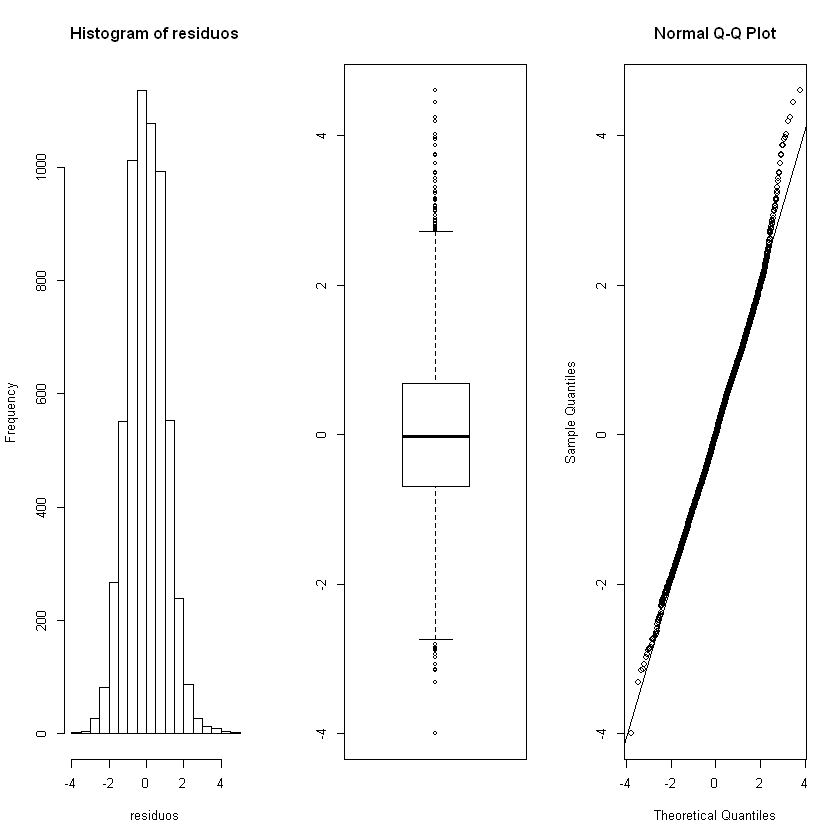

In [8]:
residuos<-rstandard(reg.price) # residuos estándares del modelo ajustado (completo) 
par(mfrow=c(1,3)) # divide la ventana en una fila y tres columnas 
hist(residuos) # histograma de los residuos estandarizados 
boxplot(residuos) # diagrama de cajas de los residuos estandarizados 
qqnorm(residuos) # gráfico de cuantiles de los residuos estandarizados 
qqline(residuos)  
par(mfrow=c(1,1)) # devuelve la pantalla a su estado original

    Se realizará un gráfico para observar la línea del modelo de regresión lineal

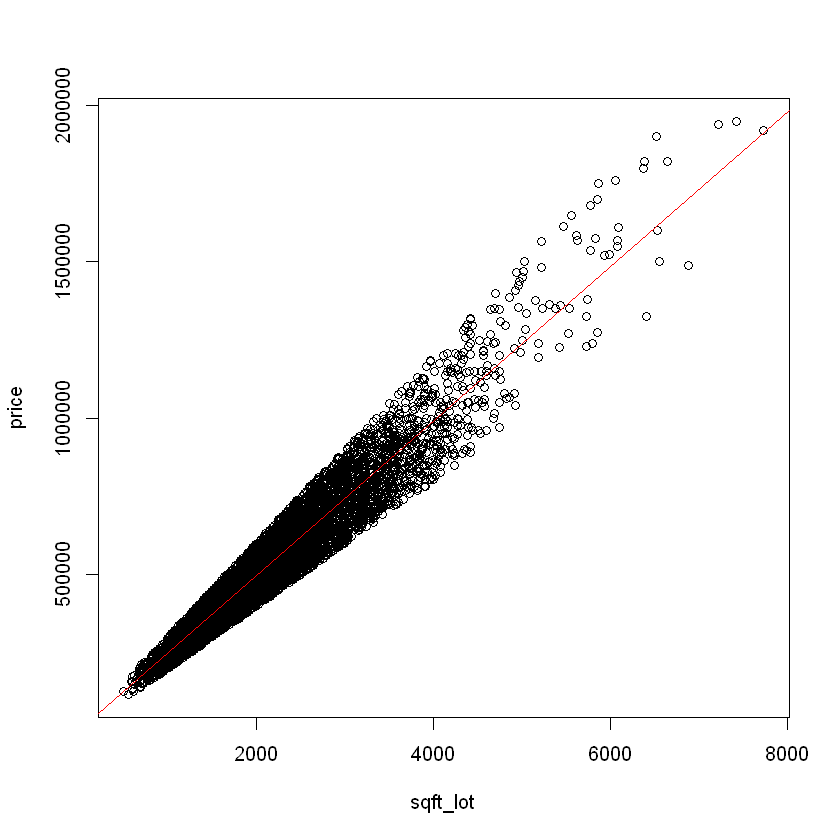

In [14]:
y<-casas.entrenamiento$price
x<-casas.entrenamiento$sqft_living
fit<-lm(y ~ x)
plot(x,y,ylab = 'price', xlab = 'sqft_lot')
abline(fit,col="red")

En el siguiente gráfico, se muestra la línea del modelo de regresión lineal y los coeficientes que se generaron en color rojo para reflejar la distancia correspondiente entre la línea de predicción y el valor real de la observación.

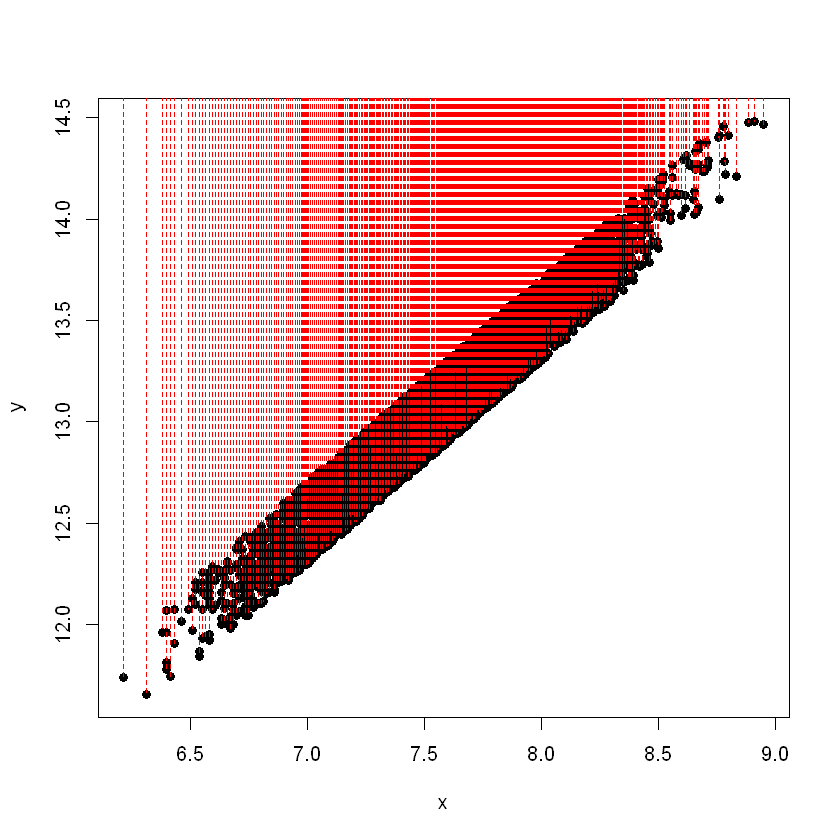

In [15]:
predt <- function(fit, x) {  # hand-made prediction function
  return (fit$coefficients[[1]] + x * fit$coefficients[[2]])
}
y<-log(casas.entrenamiento$price)
x<-log(casas.entrenamiento$sqft_living)
plot(x,y,pch=16)
abline(fit,col="red")
segments(x,predt(fit,x),x,y,col="red",lty=2)

En el siguiente gráfico, se muestra la línea del modelo de regresión lineal y los coeficientes que se generaron en color rojo para reflejar la distancia correspondiente entre la línea de predicción y el valor real de la observación. Los puntos azules muestran el valor de predicción que brindo el modelo regresión con respecto a la observación o valor real.

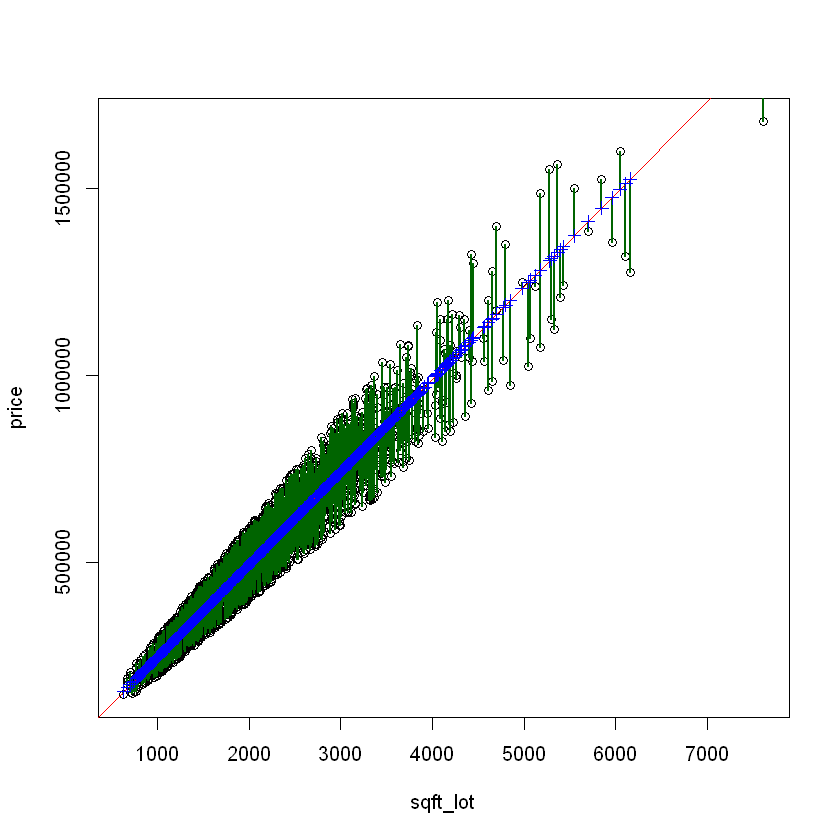

In [16]:
prediccion <-predict(reg.price, casas.prueba)
y<-casas.prueba$price
x<-casas.prueba$sqft_living
plot(x,y,ylab = 'price', xlab = 'sqft_lot')
segments(x,y,x,prediccion, col="darkgreen", lwd = 2)
abline(fit,col="red")
points(x,prediccion,col="blue",pch=3)

Se realizará el proceso para obtener valores de predicción a partir del modelo de regresión lineal simple generado.

Se utiliza los datos de prueba para la prediccion 

In [17]:
casas.prueba$prediccion <- predict(reg.price, newdata = casas.prueba)

Para una casa de 3000 metros el valor a predecir es de 743361.789 dólares

In [13]:
precio_casa <- data.frame(sqft_living = 3000)
precio_casa.prediccion <-predict(reg.price, newdata = precio_casa)
precio_casa.prediccion

1 
743361.8

Los valores de la predicion de los datos de prueba

In [14]:
casas.prueba

,price,sqft_living,prediccion
6,400000,1370,340124.7
7,530000,1810,448974.0
9,395000,1890,468764.8
13,719000,2570,636986.4
16,687500,2330,577614.0
17,640000,2360,585035.6
18,605000,2620,649355.6
30,1040000,4770,1181232.7
32,571000,2750,681515.6
33,832500,3430,849737.2


## Resultados

En conclusión, los valores obtenidos por la modelación de regresión lineal simple en los datos se estudiaron pueden establecerse como muy buenos, debido a que el total de las observaciones que puede predecir correctamente es de alrededor del 93 por ciento y solo un 7 por ciento con margen de error. Por lo que se recomienda utilizar el modelo generado para predecir el precio a partir de los metros cuadrados de construcción en el condado de King.